In [1]:
import sys; sys.path.insert(0, '..')
from blip.module.merge_tree_module import *
from blip.topology.merge_tree      import MergeTree

In [2]:
point_clouds = []

event = 0
data_file = "/home/laura/Analysis_Laura/Decorated-Merge-Trees/data/single_capture_gamma_2.5661.0/tpc2.npz"
# data_file = "/data/single_capture_gamma_2.5661.0/tpc2.npz"
f = np.load(data_file, allow_pickle=True)
point_clouds.append(np.array(f['view_2_features'][event][:, :2])) #each event is just one gamma capture

print("Number of points in point cloud 1: ",len(point_clouds[0]))
print(point_clouds)

Number of points in point cloud 1:  147
[array([[4304., 2957.],
       [4335., 3111.],
       [4335., 3112.],
       [4335., 3113.],
       [4335., 3114.],
       [4335., 3115.],
       [4335., 3116.],
       [4336., 3110.],
       [4336., 3111.],
       [4336., 3112.],
       [4336., 3113.],
       [4336., 3114.],
       [4336., 3115.],
       [4336., 3116.],
       [4336., 3117.],
       [4337., 3280.],
       [4337., 3281.],
       [4337., 3282.],
       [4337., 3283.],
       [4338., 3082.],
       [4338., 3083.],
       [4338., 3084.],
       [4338., 3279.],
       [4338., 3280.],
       [4338., 3281.],
       [4338., 3282.],
       [4338., 3283.],
       [4338., 3284.],
       [4340., 3259.],
       [4340., 3260.],
       [4340., 3261.],
       [4340., 3262.],
       [4340., 3263.],
       [4340., 3264.],
       [4340., 3265.],
       [4341., 3258.],
       [4341., 3259.],
       [4341., 3260.],
       [4341., 3261.],
       [4341., 3262.],
       [4341., 3263.],
       [4341., 3

In [3]:
proces_merge_tree?

Object `proces_merge_tree` not found.



Point Cloud 0
Number of points: 147
Number of persistence points: 65
[INIT] Merge Tree Class
[INIT] visualize_DMT_pointcloud


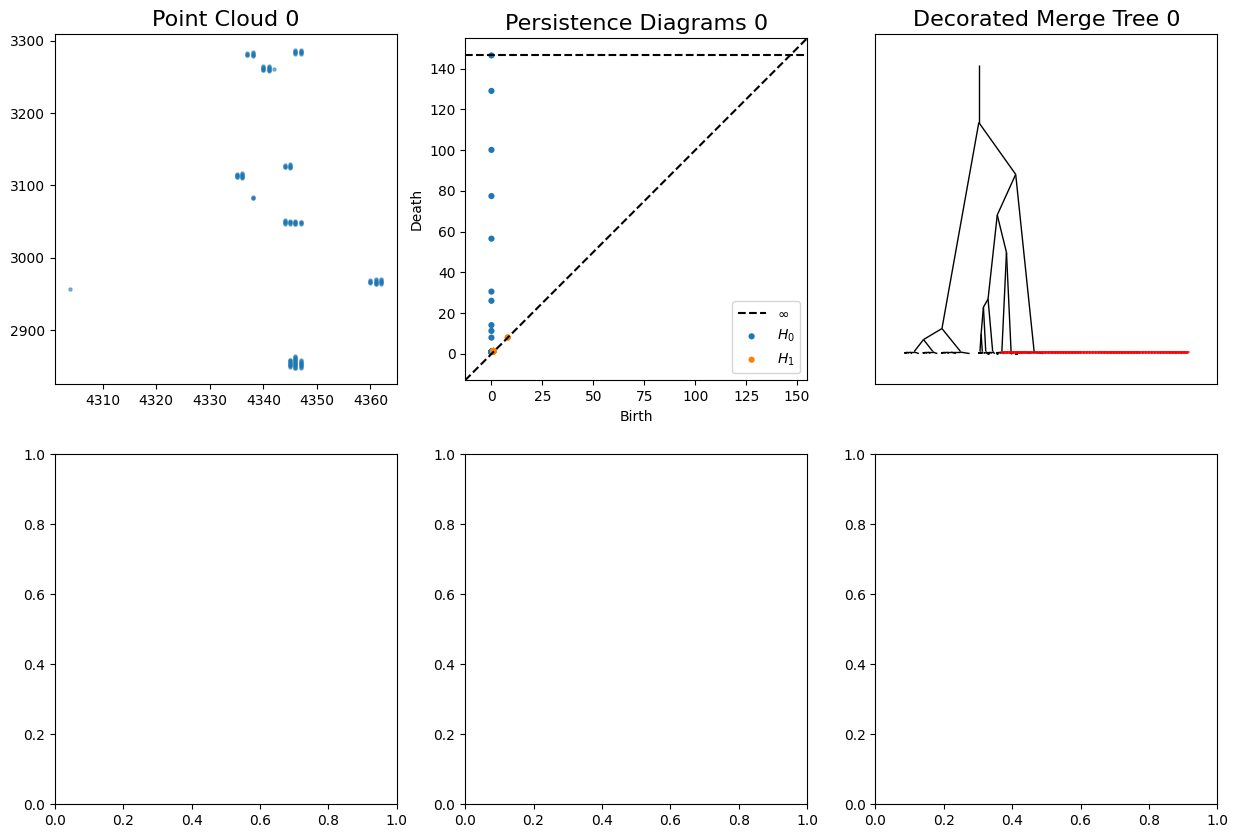

In [4]:
fig, axs = plt.subplots(len(point_clouds)+1, 3, figsize = (15,10))
for j,data in enumerate(point_clouds):
    print('\nPoint Cloud '+str(j))
    print('Number of points: '+str(data.shape[0]))
    
    # Plot point cloud
    try:               ax = axs[j,0]
    except IndexError: ax = axs[0]
    ax.set_title('Point Cloud '+str(j),fontsize = 16)
    ax.scatter(data[:,0],data[:,1], s=5,alpha=0.5)
    
    # Plot persistence diagrams
    try:               ax = axs[j,1]
    except IndexError: ax = axs[1]
    ax.set_title('Persistence Diagrams '+str(j),fontsize = 16)
    dgms = ripser(data)['dgms']
    print('Number of persistence points: '+str(dgms[1].shape[0]))    
    persim.plot_diagrams(dgms, ax = ax)
    
    # Plot decorated merge trees
    # Note: the merge tree class has a built in visualization method, but we are doing it
    # 'by hand' here to fit into the overall figure
    try:               ax = axs[j,2]
    except IndexError: ax = axs[2]
    ax.set_title('Decorated Merge Tree '+str(j),fontsize = 16)
    ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
    
    MT = MergeTree(pointCloud = data,simplify=False,debug=False)
    tree_thresh    = 0.2    # Simplification parameter for visualization
    barcode_thresh = 0.4    # Simplification parameter for visualization
    T_DMT, pos_DMT, edges, colors, weights = visualize_DMT_pointcloud(MT.tree,
                                                                      MT.height,
                                                                      dgms[1],
                                                                      data,
                                                                      tree_thresh,
                                                                      barcode_thresh,
                                                                      offset = .02,
                                                                      draw = False)
    nx.draw_networkx(T_DMT, 
                     pos = pos_DMT, 
                     edge_color=colors, 
                     width=weights,
                     node_size = 0,
                     with_labels = False,
                     ax = ax)
fig.show()
# T_DMT:   graph, 
# pos_DMT: position of the nodes in the graph
# edges:   list of edges in the graph

In [9]:
type(edges)

networkx.classes.reportviews.EdgeView

In [6]:
print(T_DMT)
print(pos_DMT)
print(edges) 

#Q: what information would you save to a file to be able to reconstruct the merge tree?
#A: the graph, the position of the nodes, the list of edges
#Q: why?


Graph with 1712 nodes and 1648 edges
{1292: (0.5, 161.32750075545087), 292: (0.5, 129.0620006043607), 286: (0.25, 14.142135623730951), 284: (0.125, 8.0), 1301: (0.0625, 1.4142135381698608), 272: (0.0625, 1.0), 271: (0.03125, 1.0), 270: (0.015625, 1.0), 269: (0.0078125, 1.0), 268: (0.00390625, 1.0), 267: (0.001953125, 1.0), 266: (0.0009765625, 1.0), 265: (0.00048828125, 1.0), 264: (0.000244140625, 1.0), 1326: (0.0001220703125, 0.2), 22: (0.0001220703125, 0), 1327: (0.0003662109375, 0.2), 23: (0.0003662109375, 0), 1319: (0.000732421875, 0.2), 15: (0.000732421875, 0), 1320: (0.00146484375, 0.2), 16: (0.00146484375, 0), 1321: (0.0029296875, 0.2), 17: (0.0029296875, 0), 1322: (0.005859375, 0.2), 18: (0.005859375, 0), 1328: (0.01171875, 0.2), 24: (0.01171875, 0), 1329: (0.0234375, 0.2), 25: (0.0234375, 0), 1330: (0.046875, 0.2), 26: (0.046875, 0), 1331: (0.09375, 0.2), 27: (0.09375, 0), 1302: (0.1875, 1.4142135381698608), 283: (0.1875, 1.0), 282: (0.15625, 1.0), 281: (0.140625, 1.0), 280: (0

In [7]:
#Q: which is T_DMT, pos_DMT and edges?
#A: T_DMT is the graph, pos_DMT is the position of the nodes in the graph, and edges is the list of edges in the graph